# K-means iteration
Stough, DIP

Here we do k-means clustering on an image, to get
representative colors for the image. 

In [10]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# For importing from alternative directory sources
import sys  
sys.path.insert(0, '../dip_utils')

# from matrix_utils import (arr_info,
#                           make_linmap)

# Helper functions written by Professor Stough
from vis_utils import (vis_rgb_cube,
                       vis_hists,
                       vis_pair,
                       vis_surface)

from scipy.spatial.distance import cdist

K = 100
MAXITER = 20
NUMPOINTS = 100

In [12]:
I = plt.imread('../data/monet_jpg/000c1e3bff.jpg').astype(float)
X = np.stack([I[...,i].ravel() for i in range(3)]).T

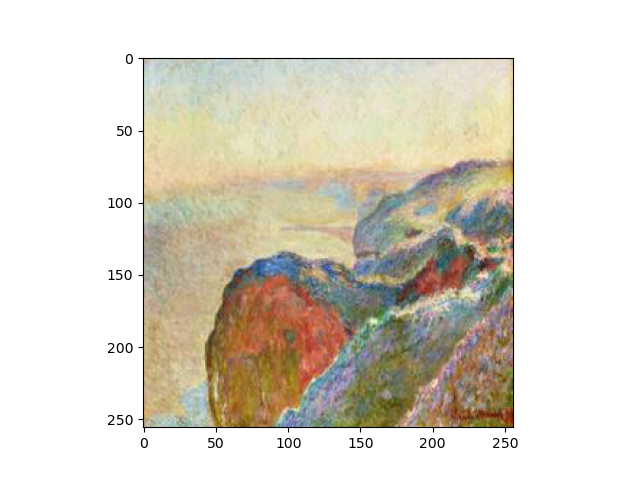

In [13]:
plt.figure()
plt.imshow(I/255)

In [14]:
X[:10,:]

array([[180., 178., 139.],
       [193., 191., 153.],
       [202., 202., 166.],
       [199., 199., 165.],
       [187., 188., 157.],
       [182., 182., 156.],
       [188., 190., 168.],
       [197., 200., 181.],
       [196., 200., 183.],
       [205., 211., 197.]])

In [15]:
# For fun: Let's pick some random (and good) cluster colors
clusterColors = np.random.rand(K, 3) # Picking random colors for each cluster.
varsSoFar = np.var(clusterColors, axis=0) # Should be 1 x 2 of the variance of each column.

for i in range(3*K):
    tempColors = np.random.rand(K, 3) #Picking K random colors
    vartemp = np.var(tempColors, axis=0)
    if np.all(vartemp > varsSoFar):
        clusterColors = tempColors
        varsSoFar = vartemp

In [16]:
clusterColors

array([[0.32808323, 0.60446778, 0.4421837 ],
       [0.04075434, 0.48049162, 0.11709818],
       [0.8106814 , 0.9162184 , 0.97339683],
       [0.45942475, 0.17810818, 0.78064716],
       [0.18628244, 0.29421069, 0.05399483],
       [0.00752024, 0.03525729, 0.93392653],
       [0.03302932, 0.1396812 , 0.8866289 ],
       [0.09947648, 0.14681121, 0.26644088],
       [0.77814706, 0.1757484 , 0.32495992],
       [0.93164463, 0.65837866, 0.78246019],
       [0.04584875, 0.33945782, 0.86240278],
       [0.66918201, 0.43671457, 0.02041345],
       [0.33123997, 0.22240141, 0.59452326],
       [0.29787986, 0.41606713, 0.03293816],
       [0.20334125, 0.13438379, 0.98823514],
       [0.28766897, 0.77775889, 0.0854319 ],
       [0.81493916, 0.19331037, 0.73923044],
       [0.32694045, 0.73706421, 0.89215592],
       [0.72884907, 0.61263816, 0.08147418],
       [0.97930434, 0.90289137, 0.44264595],
       [0.00517346, 0.03223019, 0.21943617],
       [0.196143  , 0.62013454, 0.80989309],
       [0.

&nbsp;

### Pick some initial cluster centers.

In [17]:
# K-means: initialization
# pick K initial cluster centers.
# whichinit = random.randint(0, len(X), size=(K,)) # Could generate repeats.
whichinit = np.random.choice(len(X), size=K, replace=False)
CC = X[whichinit, :].copy() # Cluster Centers

In [18]:
CC_init = CC.copy()
CC

array([[ 95.,  88.,  95.],
       [212., 199., 167.],
       [203., 209., 195.],
       [216., 184., 146.],
       [203., 184., 142.],
       [176., 166., 141.],
       [ 83.,  85.,  45.],
       [177., 190., 198.],
       [233., 226., 207.],
       [118.,  71.,  19.],
       [182., 161., 118.],
       [ 78.,  66.,  50.],
       [167., 146.,  55.],
       [126., 157., 162.],
       [143., 150., 132.],
       [160., 131.,  87.],
       [225., 217., 180.],
       [164., 148., 174.],
       [218., 205., 161.],
       [158., 108.,  75.],
       [145., 142., 101.],
       [ 92., 109., 119.],
       [173., 156., 130.],
       [162., 131., 100.],
       [185., 180., 158.],
       [219., 219., 195.],
       [191.,  88.,  53.],
       [236., 228., 215.],
       [201., 213., 201.],
       [200., 210., 201.],
       [210., 203., 151.],
       [211., 198., 163.],
       [131.,  93.,  84.],
       [202., 217., 194.],
       [192., 203., 189.],
       [207., 209., 198.],
       [187., 169., 129.],
 

&nbsp;

### The main Expectation-Maximization loop

Basically, we assign a cluster to each point, and then
recompute the clusters based on that assignment.

In [19]:
# Main Expectation-Maximization loop
# Assign a cluster to each point, then recompute the clusters based on that assignment
# K-means: compute: for every data point determine which center is closest.
# Need some magic function that computes the distance between every row of X
# (the points) and every row of CC (the clusters).
for i in range(MAXITER):
    D = cdist(X, CC, 'euclidean')
    # D should be NUMPOINTS x K

    whichCluster = np.argmin(D, axis=1) # NUMPOINTS x 1 of which center was closest

    # K-means: recompute the cluster centers as the mean of the data in each cluster
    for c in range(K):
        if np.any(whichCluster == c):
            CC[c,:] = np.mean(X[whichCluster == c, :], axis=0) # average of just those that were closest to c.

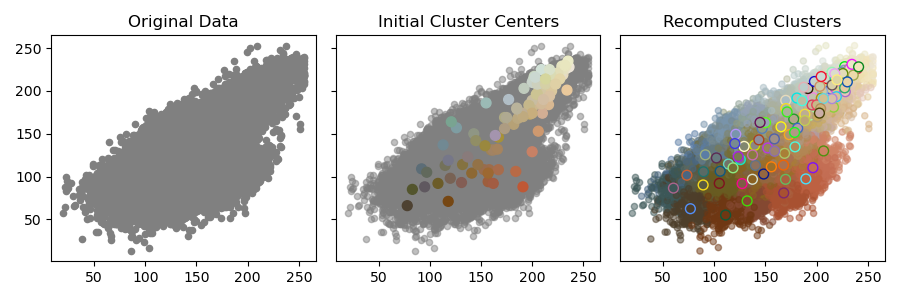

In [22]:
# Doing this on a big image, don't want to scatter 100Ks of points, really slow.
rands = np.sort(np.random.choice(len(X), size=500*K, replace=False))


f, ax = plt.subplots(1,3, figsize=(9,3), sharex=True, sharey=True)
ax[0].scatter(X[rands,0], X[rands,1], c='gray', s=20)
ax[0].set_title('Original Data')


ax[1].scatter(X[rands,0], X[rands,1], c='gray', alpha=.5, s=20)
ax[1].scatter(CC_init[:,0], CC_init[:,1], c=CC_init/255, s=50)
ax[1].set_title('Initial Cluster Centers')


pointColors = CC[whichCluster[rands], :]
clusterEdgeColors = 1 - clusterColors # for contrast, make the cluster center edges opposite.
# clusterEdgeColors = 1 - CC/255 # for contrast, make the cluster center edges opposite.

ax[2].scatter(X[rands,0], X[rands,1], c=pointColors/255, alpha=.5, s=20)
ax[2].scatter(CC[:,0], CC[:,1], c=CC/255, edgecolors=clusterEdgeColors, s=50)
ax[2].set_title('Recomputed Clusters')

plt.tight_layout()

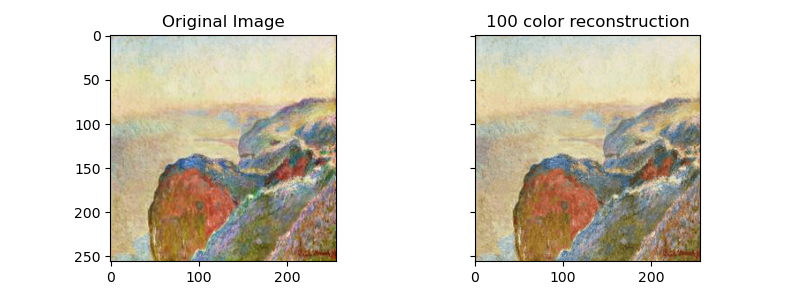

In [33]:
f, ax = plt.subplots(1,2, figsize=(8,3), sharex=True, sharey=True)

ax[0].imshow(I/255)
ax[0].set_title('Original Image')

# Reconstructed Image.
Ir = np.reshape(CC[whichCluster,:], I.shape)
ax[1].imshow(Ir/255) # Because it's floating point.
ax[1].set_title('{} color reconstruction'.format(K))

plt.tight_layout()
plt.show()

In [34]:
CC.shape

(100, 3)

In [35]:
test_img = np.zeros((100, 100, 3))

for i in range(10):
    for j in range(10):

        test_img[i*10:i*10 + 10, j*10:j*10 + 10, :] = np.array(CC[10*i + j])



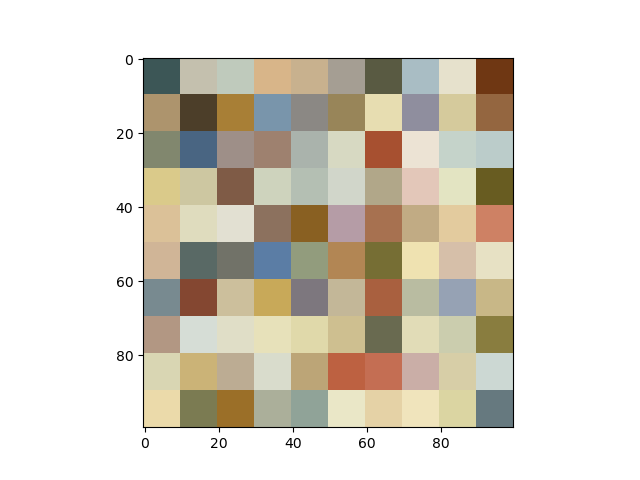

In [36]:
plt.figure()
plt.imshow(test_img/255)
plt.show()

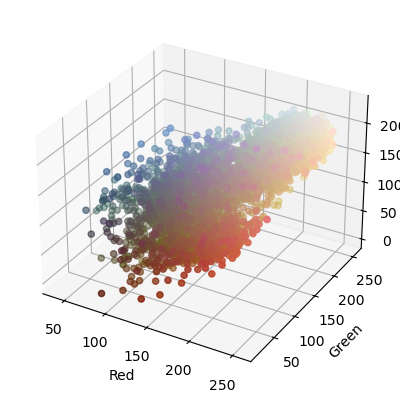

In [12]:
vis_rgb_cube(I)

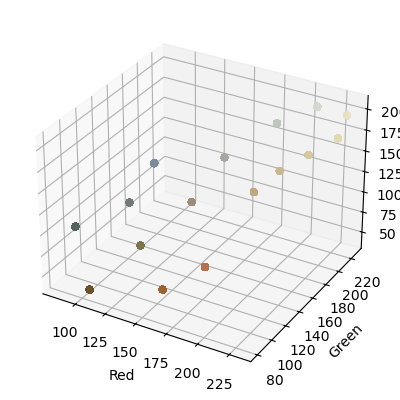

In [13]:
vis_rgb_cube(Ir)